# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis
> (c) 2019 Peter C. Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
#import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

# Estimates of Location
## Example: Location Estimates of Population and Murder Rates

Variables with measured or count data might have thousands of distinct values. A basic step in exploring
your data is getting a “typical value” for each feature (variable): an estimate of where most of the data is
located (i.e., its central tendency).

Table 1-2 shows the first few rows in the data set containing population and murder rates (in units of
murders per 100,000 people per year) for each state.

In [4]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Compute the mean, trimmed mean, and median for Population. For `mean` and `median` we can use the _pandas_ methods of the data frame. The trimmed mean requires the `trim_mean` function in _scipy.stats_.

Mean: The sum of all values divided by the number of values.

Weighted mean: The sum of all values times a weight divided by the sum of the weights.

Median: The value such that one-half of the data lies above and below.

Weighted median: The value such that one-half of the sum of the weights lies above and below the sorted data.

Trimmed mean: The average of all values after dropping a fixed number of extreme values.

Robust: Not sensitive to extreme values.

Outlier: A data value that is very different from most of the data.

In [5]:
state = pd.read_csv(STATE_CSV)
print(state['Population'].mean())

6162876.3


In [6]:
print(trim_mean(state['Population'], 0.1))

4783697.125


In [7]:
print(state['Population'].median())

4436369.5


The mean is bigger than the trimmed mean, which is bigger than the median.
This is because the trimmed mean excludes the largest and smallest five states (trim=0.1 drops 10%
from each end).

If we want to compute the average murder rate for the country, we need to use a weighted
mean or median to account for different populations in the states.

In [8]:
print(state['Murder.Rate'].mean())

4.066


In [9]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


The basic metric for location is the mean, but it can be sensitive to extreme values (outlier).

Other metrics (median, trimmed mean) are more robust.

# Estimates of Variability

Table 1-3 shows the first few rows in the data set containing population and murder rates for each state.

In [12]:
# Table 1-2
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


Standard deviation

In [13]:
print(state['Population'].std())

6848235.347401142


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [14]:
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


Median absolute deviation from the median can be calculated with a method in _statsmodels_

In [15]:
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

3849876.1459979336
3849876.1459979336


The variance and standard deviation are the most widespread and routinely reported statistics of variability.

Both are sensitive to outliers.

More robust metrics include mean and median absolute deviations from the mean and percentiles (quantiles).

Each of the estimates we’ve covered sums up the data in a single number to describe the location or
variability of the data. It is also useful to explore how the data is distributed overall.

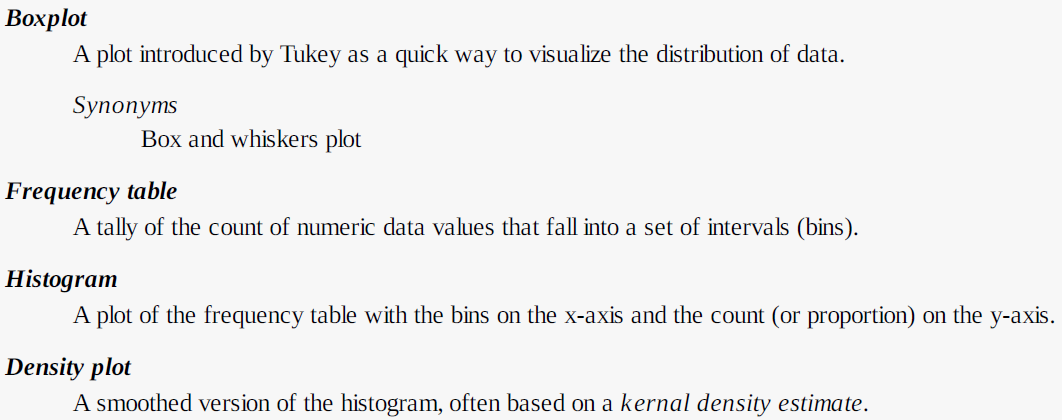

## Percentiles and Boxplots


In “Estimates Based on Percentiles”, we explored how percentiles can be used to measure the spread of
the data. Percentiles are also valuable to summarize the entire distribution. It is common to report the
quartiles (25th, 50th, and 75th percentiles) and the deciles (the 10th, 20th, …, 90th percentiles).
Percentiles are especially valuable to summarize the tails (the outer range) of the distribution. Popular
culture has coined the term one-percenters to refer to the people in the top 99th percentile of wealth.

_Pandas_ has the `quantile` method for data frames.

In [16]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [24]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]

print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


The median is 4 murders per 100,000 people, although there is quite a bit of variability: the 5th percentile
is only 1.6 and the 95th percentile is 6.51.

_Pandas_ provides a number of basic exploratory plots; one of them are boxplots

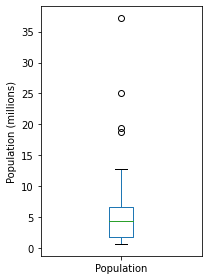

In [26]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the
horizontal line in the box. The dashed lines, referred to as whiskers, extend from the top and bottom to
indicate the range for the bulk of the data.

## Frequency Table and Histograms
The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.

A frequency table of a variable divides up the variable range into equally spaced segments, and tells us
how many values fall in each segment. Table 1-5 shows a frequency table of the population by state

In [27]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64


In [28]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

The least populous state is Wyoming, with 563,626 people (2010 Census) and the most populous is
California, with 37,253,956 people. This gives us a range of 37,253,956 – 563,626 = 36,690,330, which
we must divide up into equal size bins — let’s say 10 bins. With 10 equal size bins, each bin will have a
width of 3,669,033, so the first bin will span from 563,626 to 4,232,658. By contrast, the top bin,
33,584,923 to 37,253,956, has only one state: California. The two bins immediately below California are
empty, until we reach Texas.

It is important to include the empty bins; the fact that there are no values in
those bins is useful information. It can also be useful to experiment with different bin sizes. If they are too
large, important features of the distribution can be obscured. It they are too small, the result is too
granular and the ability to see bigger pictures is lost.

_Pandas_ also supports histograms for exploratory data analysis.

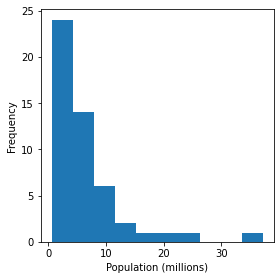

In [29]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

## Density Estimates
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

Related to the histogram is a density plot, which shows the distribution of data values as a continuous
line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly
from the data through a kernal density estimate (see [Duong-2001] for a short tutorial). Figure 1-4
displays a density estimate superposed on a histogram.

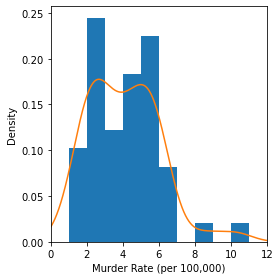

In [30]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data (multiple estimates
are possible, of course).

# Exploring Binary and Categorical Data

Getting a summary of a binary variable or a categorical variable with a few categories is a fairly easy
matter: we just figure out the proportion of 1s, or of the important categories. For example, Table 1-6
shows the percentage of delayed flights by the cause of delay at Dallas/Fort Worth airport since 2010.
Delays are categorized as being due to factors under carrier control, air traffic control (ATC) system
delays, weather, security, or a late inbound aircraft.

In [31]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


_Pandas_ also supports bar charts for displaying a single categorical variable.

Bar charts are a common visual tool for displaying a single categorical variable, often seen in the popular
press. Categories are listed on the x-axis, and frequencies or proportions on the y-axis. Figure 1-5 shows
the airport delays per year by cause for Dallas/Fort Worth, and it is produced with the R function
barplot:

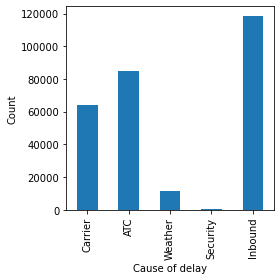

In [32]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a
factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale.
In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not
occur in the data. In a bar chart, the bars are shown separate from one another.

# Correlation
First read the required datasets

Exploratory data analysis in many modeling projects (whether in data science or in research) involves
examining correlation among predictors, and between predictors and a target variable. Variables X and Y
(each with measured data) are said to be positively correlated if high values of X go with high values of
Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice
versa, the variables are negatively correlated.

In [45]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


Table 1-7, called a correlation matrix, shows the correlation between the daily returns for
telecommunication stocks from July 2012 through June 2015. From the table, you can see that Verizon
(VZ) and ATT (T) have the highest correlation. Level Three (LVLT), which is an infrastructure company,
has the lowest correlation. Note the diagonal of 1s (the correlation of a stock with itself is 1), and the
redundancy of the information above and below the diagonal.

In [34]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


Next we focus on funds traded on major exchanges (sector == 'etf'). 

In [35]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

A table of correlations like Table 1-7 is commonly plotted to visually display the relationship between
multiple variables. Figure 1-6 shows the correlation between the daily returns for major exchange traded
funds (ETFs). In R, we can easily create this using the package corrplot:

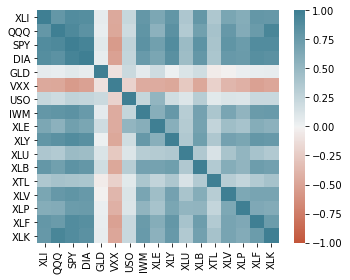

In [36]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

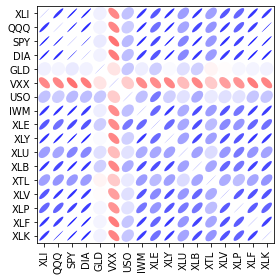

In [37]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

The ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. Similary, the
QQQ and the XLK, composed mostly of technology companies, are postively correlated. Defensive ETFs,
such as those tracking gold prices (GLD), oil prices (USO), or market volatility (VXX) tend to be
negatively correlated with the other ETFs. The orientation of the ellipse indicates whether two variables
are positively correlated (ellipse is pointed right) or negatively correlated (ellipse is pointed left). The
shading and width of the ellipse indicate the strength of the association: thinner and darker ellipses
correspond to stronger relationships.

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data.
Software packages offer robust alternatives to the classical correlation coefficient.

## Scatterplots
Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

The standard way to visualize the relationship between two measured data variables is with a scatterplot.
The x-axis represents one variable, the y-axis another, and each point on the graph is a record. See Figure
1-7 for a plot between the daily returns for ATT and Verizon.

The returns have a strong positive relationship: on most days, both stocks go up or go down in tandem.
There are very few days where one stock goes down significantly while the other stock goes up (and vice
versa).

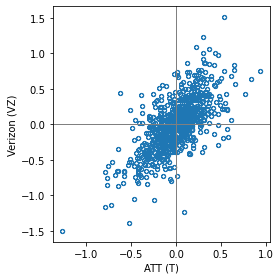

In [38]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_line1)


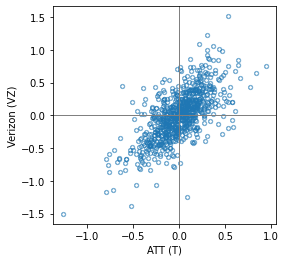

In [39]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

# Exploring Two or More Variables
Load the kc_tax dataset and filter based on a variety of criteria

In [40]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


## Hexagonal binning and Contours 
### Plotting numeric versus numeric data

If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

Scatterplots are fine when there is a relatively small number of data values. The plot of stock returns in
Figure 1-7 involves only about 750 points. For data sets with hundreds of thousands or millions of
records, a scatterplot will be too dense, so we need a different way to visualize the relationship. To
illustrate, consider the data set kc_tax, which contains the tax-assessed values for residential properties
in King County, Washington. In order to focus on the main part of the data, we strip out very expensive and
very small or large residences using the subset function:

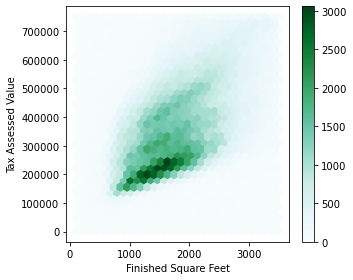

In [41]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

Figure 1-8 is a hexagon binning plot of the relationship between the finished square feet versus the taxassessed
value for homes in King County. Rather than plotting points, which would appear as a monolithic
dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating
the number of records in that bin. In this chart, the positive relationship between square feet and taxassessed
value is clear. An interesting feature is the hint of a second cloud above the main cloud,
indicating homes that have the same square footage as those in the main cloud, but a higher tax-assessed
value.

The _seaborn_ kdeplot is a two-dimensional extension of the density plot. 

Figure 1-9 uses contours overlaid on a scatterplot to visualize the relationship between two numeric
variables. The contours are essentially a topographical map to two variables; each contour band
represents a specific density of points, increasing as one nears a “peak.” This plot shows a similar story
as Figure 1-8: there is a secondary peak “north” of the main peak. This chart was also created using
ggplot2 with the built-in geom_density2d function.

C:\Users\mahmu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


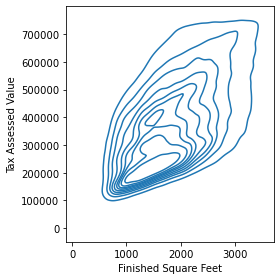

In [47]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## Two Categorical Variables
Load the `lc_loans` dataset

In [48]:
lc_loans = pd.read_csv(LC_LOANS_CSV)

A useful way to summarize two categorical variables is a contingency table — a table of counts by
category. Table 1-8 shows the contingency table between the grade of a personal loan and the outcome of
that loan. This is taken from data provided by Lending Club, a leader in the peer-to-peer lending business.
The grade goes from A (high) to G (low). The outcome is either paid off, current, late, or charged off (the
balance of the loan is not expected to be collected). This table shows the count and row percentages.
High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans.
Contingency tables can look at just counts, or also include column and total percentages. Pivot tables in
Excel are perhaps the most common tool used to create contingency tables.

In [49]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [50]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## Categorical and Numeric Data
_Pandas_ boxplots of a column can be grouped by a different column.

Boxplots (see “Percentiles and Boxplots”) are a simple way to visually compare the distributions of a
numeric variable grouped according to a categorical variable. For example, we might want to compare
how the percentage of flight delays varies across airlines. Figure 1-10 shows the percentage of flights in a
month that were delayed where the delay was within the carrier’s control.

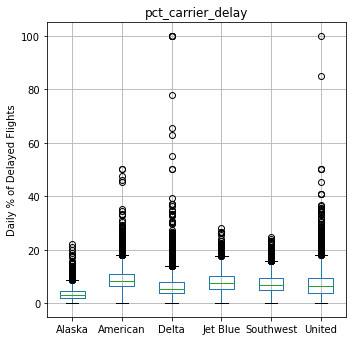

In [51]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

Alaska stands out as having the fewest delays, while American has the most delays: the lower quartile for
American is higher than the upper quartile for Alaska.

_Pandas_ also supports a variation of boxplots called _violinplot_. 

C:\Users\mahmu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


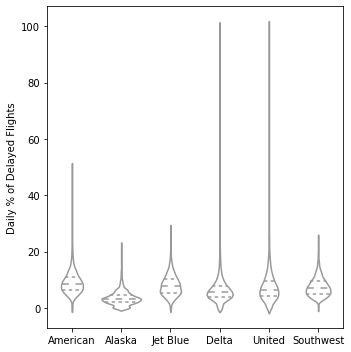

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(airline_stats.airline, airline_stats.pct_carrier_delay,
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

A violin plot, introduced by [Hintze-Nelson-1998], is an enhancement to the boxplot and plots the density
estimate with the density on the y-axis. The density is mirrored and flipped over and the resulting shape is
filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances
in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows
the outliers in the data. In ggplot2, the function geom_violin can be used to create a violin plot as
follows:
    
The corresponding plot is shown in Figure 1-11. The violin plot shows a concentration in the distribution
near zero for Alaska, and to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot. You
can combine a violin plot with a boxplot by adding geom_boxplot to the plot (although this is best when
colors are used).

## Visualizing Multiple Variables

The types of charts used to compare two variables — scatterplots, hexagonal binning, and boxplots — are
readily extended to more variables through the notion of conditioning. As an example, look back at
Figure 1-8, which showed the relationship between homes’ finished square feet and tax-assessed values.
We observed that there appears to be a cluster of homes that have higher tax-assessed value per square
foot. Diving deeper, Figure 1-12 accounts for the effect of location by plotting the data for a set of zip
codes. Now the picture is much clearer: tax-assessed value is much higher in some zip codes (98112,
98105) than in others (98108, 98057). This disparity gives rise to the clusters observed in Figure 1-8.

We created Figure 1-12 using ggplot2 and the idea of facets, or a conditioning variable (in this case zip
code):

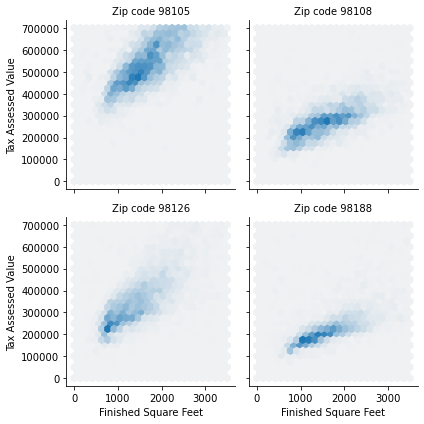

In [53]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

The concept of conditioning variables in a graphics system was pioneered with Trellis graphics,
developed by Rick Becker, Bill Cleveland, and others at Bell Labs [Trellis-Graphics]. This idea has
propogated to various modern graphics systems, such as the lattice ([lattice]) and ggplot2 packages in
R and the Seaborn ([seaborne]) and Bokeh ([bokeh]) modules in Python. Conditioning variables are also
integral to business intelligence platforms such as Tableau and Spotfire. With the advent of vast
computing power, modern visualization platforms have moved well beyond the humble beginnings of
exploratory data analysis. However, key concepts and tools developed over the years still form a
foundation for these systems.